In [1]:
import math
import numpy as np
import uncertainties as unc
from uncertainties import unumpy as unp
import seaborn as sns

In [2]:
def R_np(x):
    """
    Based on parametrization of F_2n/R_2p(x) by:
    Arrington, J. et al. J. Phys. G36 (2009) 025005
    """
    if isinstance(x, float):
        x_bak = x
        x = []
        x.append(x_bak)
        del x_bak
        rnp = 0.0
    
    p1 = 0.816 
    p2 = -0.661
    p3 = 0.184
    p4 = 5.509
    p5 = -0.034
    p6 = 8.714
    p7 = -0.072
    p8 = 0.450
    a = p1 + np.multiply(p2,x)
    b = np.multiply(p3, np.exp(np.multiply(-1.0*p4, x))) 
    c = np.multiply(p5, np.exp(np.multiply(-1.0*p6,(np.subtract(1.0,x)))))
    d = np.multiply(p7, np.square(np.maximum(np.zeros(len(x)),np.subtract(x,p8))))
    rnp = a + b + c + d
    
    return rnp

In [153]:
def R_ISO(x, A, Z):
    """
    An isoscalar correction factor as outlined by:
    Hen, Or et al. Int. J. Mod. Phys. E22 (2013) 1330017
    """
    A = float(A)
    Z = float(Z)
    N = A - Z
    c = np.multiply(A/2.0,np.divide((1.0+R_np(x)),(Z + np.multiply(N,R_np(x)))))
    
    return c

In [60]:
# Fit parameters for the F_2d(x,Q2) function
C = []
C.append(unc.ufloat(0.948,0.027))
C.append(unc.ufloat(-0.115,0.215))
C.append(unc.ufloat(1.861,0.624))
C.append(unc.ufloat(-4.733,0.762))
C.append(unc.ufloat(2.348,0.333))
C.append(unc.ufloat(-0.065,0.024))
C.append(unc.ufloat(-0.224,0.144))
C.append(unc.ufloat(1.085,0.193))
C.append(unc.ufloat(0.213,0.024))
C.append(unc.ufloat(-1.687,0.183))
C.append(unc.ufloat(3.409,0.439))
C.append(unc.ufloat(-3.255,0.333))

In [61]:
def lambda1(x):
    """Helper function for F2_d(x,Q2)"""
    l1 = 0.0
    for i in range(0,4):
        l1 += np.multiply(C[i+8],np.power(x,i))
    return l1

In [63]:
def F2_A(x):
    """Helper function for F2_d(x,Q2)"""
    return np.multiply(1.22,np.exp(np.multiply(3.2,x)))

In [140]:
def beta(x, Q2):
    """Helper function for F2_d(x,Q2)"""
    b1 = np.power(1.0 - np.exp(-1.0*np.minimum(20.0*np.ones(len(x)),
                                               np.multiply(7.7,
                                                           np.divide(1.0,x)+
                                                           (np.divide(0.938**2,Q2))-1.0
                                                           )
                                              )
                              ),
                  -1.0)
    return b1

In [117]:
def F2_thr(x):
    """Helper function for F2_d(x,Q2)"""
    c = 0.0
    for i in range(0,6):
        c += np.multiply(C[i],np.power(np.subtract(1.0,x),i+2))
    return c

In [118]:
def F2_d(x, Q2):
    """
    Based on parametrization of deuterium outlined in:
    Whitlow, et al. Phys. Lett. B282 (1992) 475-482
    """
    f2d = 0.0
    f2d = beta(x, Q2) * F2_thr(x) * (1 + lambda1(x) * np.log(Q2/F2_A(x)))
    return f2d

In [143]:
def F2_d_ratio(x2, x1, Q2):
    """Helper function for taking the ratio of two F2_d calls."""
    if isinstance(x1, float):
        x1_bak = x1
        x1 = []
        x1.append(x1_bak)
        del x1_bak
    if isinstance(x2, float):
        x2_bak = x2
        x2 = []
        x2.append(x2_bak)
        del x2_bak
    if isinstance(Q2, float):
        Q2_bak = Q2
        Q2 = []
        Q2.append(Q2_bak)
    f2d2 = F2_d(x2, Q2)
    f2d1 = F2_d(x1, Q2)
    return f2d2/f2d1

In [3]:
import strfunct as sf

In [4]:
import matplotlib.pyplot as plt

In [22]:
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.4)

In [8]:
%matplotlib inline

In [9]:
x = np.arange(0.01, 0.8, 0.01)

In [10]:
rnp, rnp_std = sf.R_np(x)

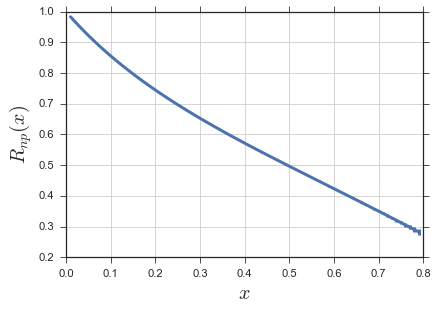

In [43]:
plt.errorbar(x, rnp, yerr=rnp_std, lw=3)
plt.grid()
#plt.legend(loc='best', fontsize=20, frameon=True)
plt.ylabel(r'$R_{np}(x)$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.savefig('rnp.png')

In [34]:
riso_fe, riso_fe_std = sf.R_ISO(x, 56, 26)
riso_w, riso_w_std = sf.R_ISO(x, 184, 74)

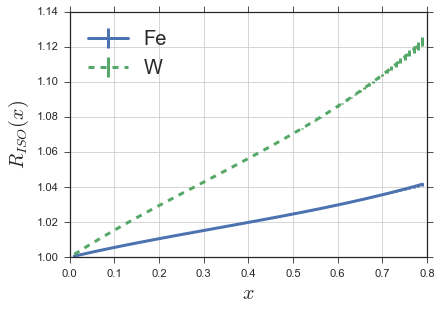

In [42]:
plt.errorbar(x, riso_fe, yerr=riso_fe_std, label='Fe', lw=3)
plt.errorbar(x, riso_w, yerr=riso_w_std, label='W', lw=3, ls='--')
plt.grid()
#plt.legend(loc='best', fontsize=20, frameon=True)
plt.ylabel(r'$R_{ISO}(x)$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.savefig('riso.png')